https://github.com/amit-sharma-ds

https://www.linkedin.com/in/amit-sharma-ds/
    
amsharma2607@gmail.com

contact: 8527850441, 9599018317

# Analysis we will cover

1. Understanding Data
2. Statistical Analysis
3. Data Visualization
4. EDA & Data Cleaning
5. Calculating si, ni, rpi, spi and AQI
6. Splitting the data into Independed (X) and Dependent (y)
7. Model Building (Regression Algorithms & Classification)
8. Prediction 
9. Saving the cleaned data for analyse on POWERBI
10. Conclusion [we can use Time Series Models Also like ARIMA, SARIMA]

## Importing necessary

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [207]:
df = pd.read_csv('data.csv',encoding='unicode_escape')

# Data Understanding

In [208]:
df.head()

stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3                         NaN    NaN  1990-03-01  
4                         NaN    NaN  1990-03-01

In [209]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns

(435742, 13)

In [210]:
df.info()
# Checking the over all information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [211]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [212]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data
# like mean, standard deviation, min values and max values present in the data

so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000

In [213]:
df.nunique()
# There are all the unique values present in the df

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

### Columns

In [214]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

* stn_code (station code) 

* sampling_date (date of sample collection)

* state (Indian State) 

* location (location of sample collection) 

* agency type (type of area) 

* so2 (sulphur dioxide concentration)

* no2 (nitrogen dioxide concentration)

* rspm (respirable suspended particulate matter concentration)

* spm (suspended particulate matter) 

* location_monitoring_station 

* pm2_5 (particulate matter 2.5) 

* date (date)

# Data Visualization

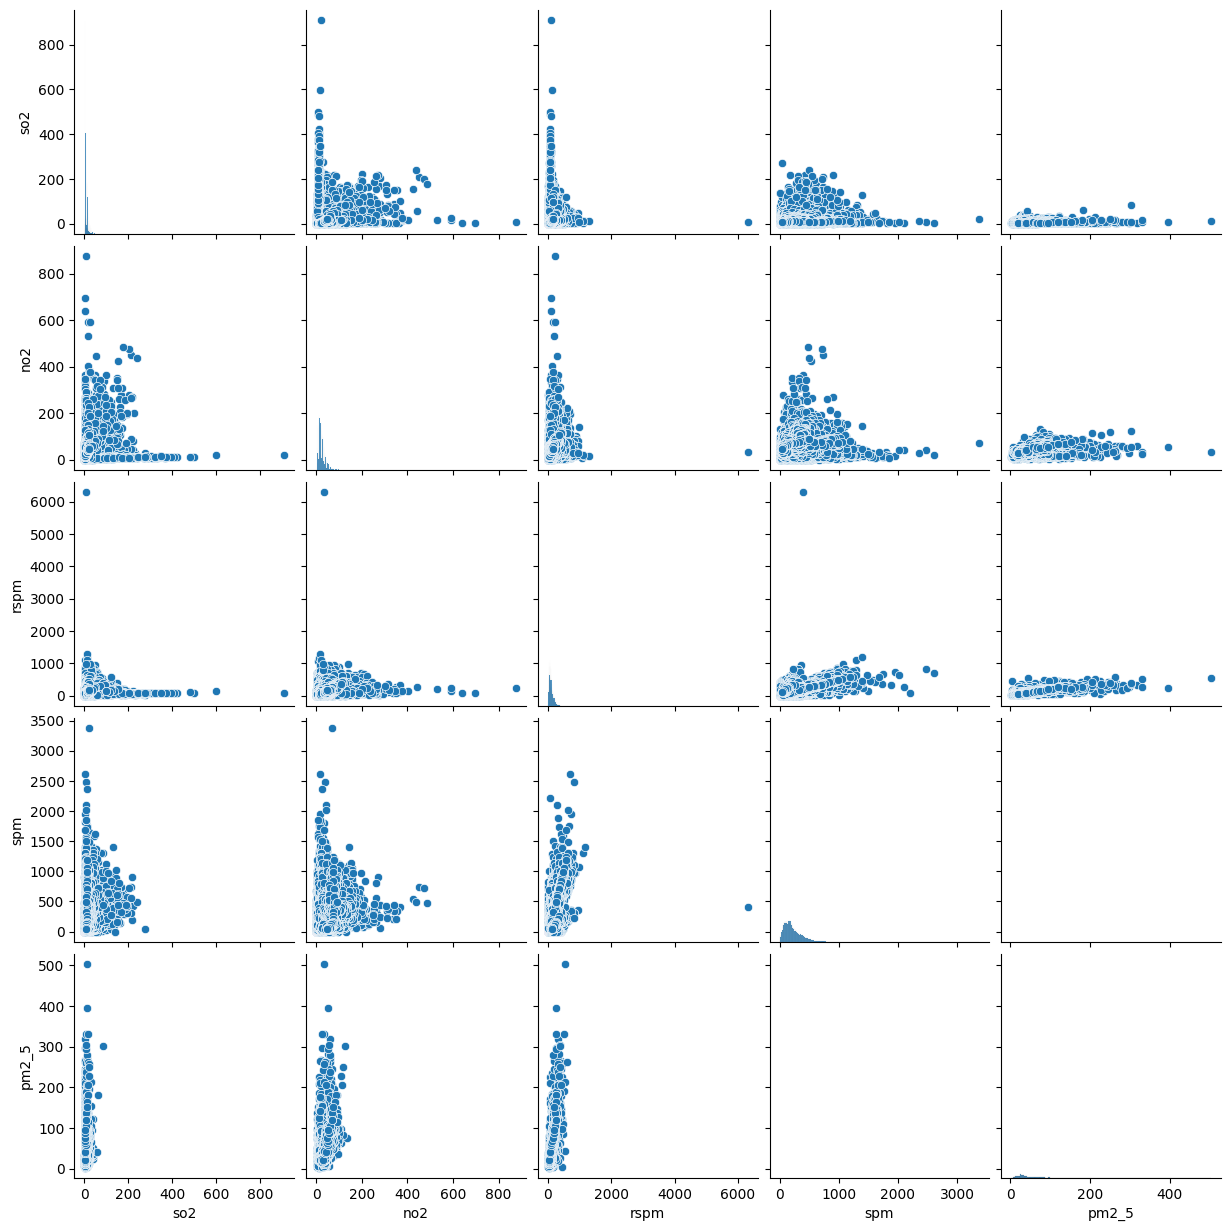

In [215]:
sns.pairplot(data=df)

In [216]:
df['state'].value_counts()

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

# Viewing the count of values preesent in the state column

In [217]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualizatioin shows us the count of states present in the dataset.

[]

In [218]:
df['type'].value_counts()
# Viewing the count of values present in the type column

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

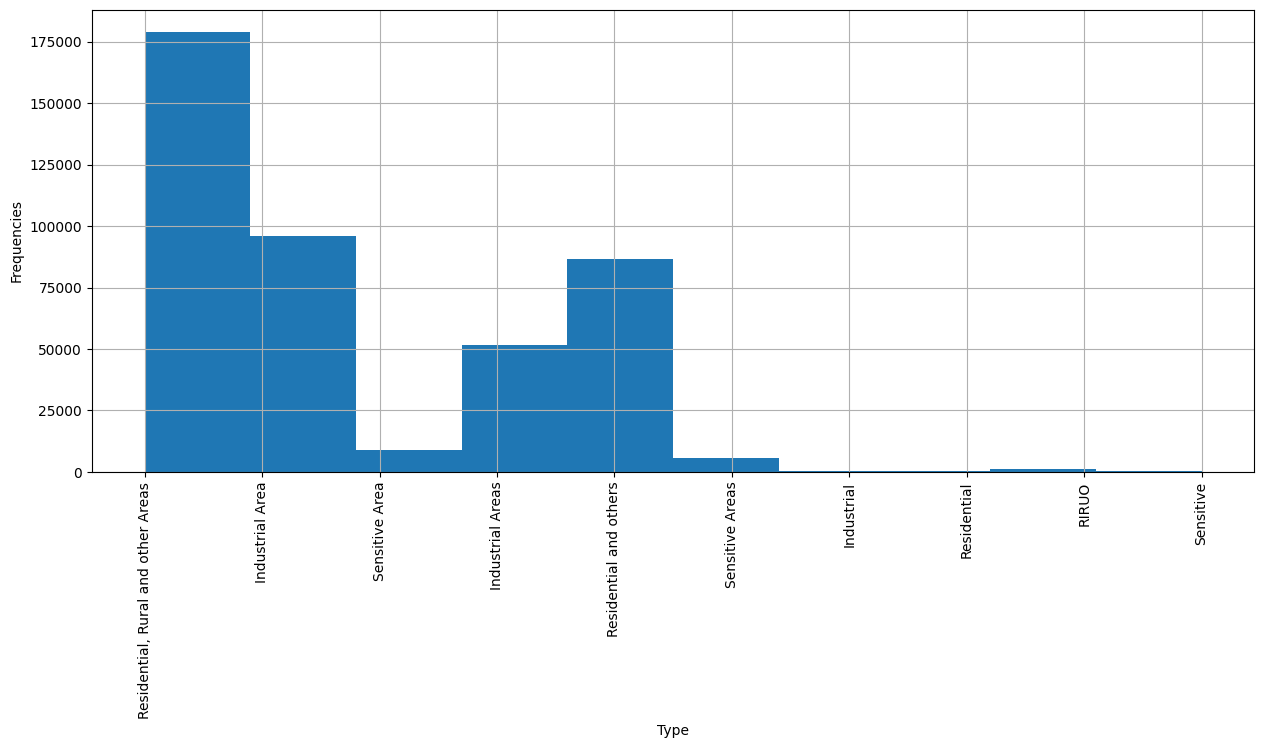

In [219]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Tyhpes present in the dataset.

In [220]:
df['agency'].value_counts()
# Viewing the count of values present in the type column

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

In [221]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequency')
plt.plot()

[]

<Axes: xlabel='state', ylabel='so2'>

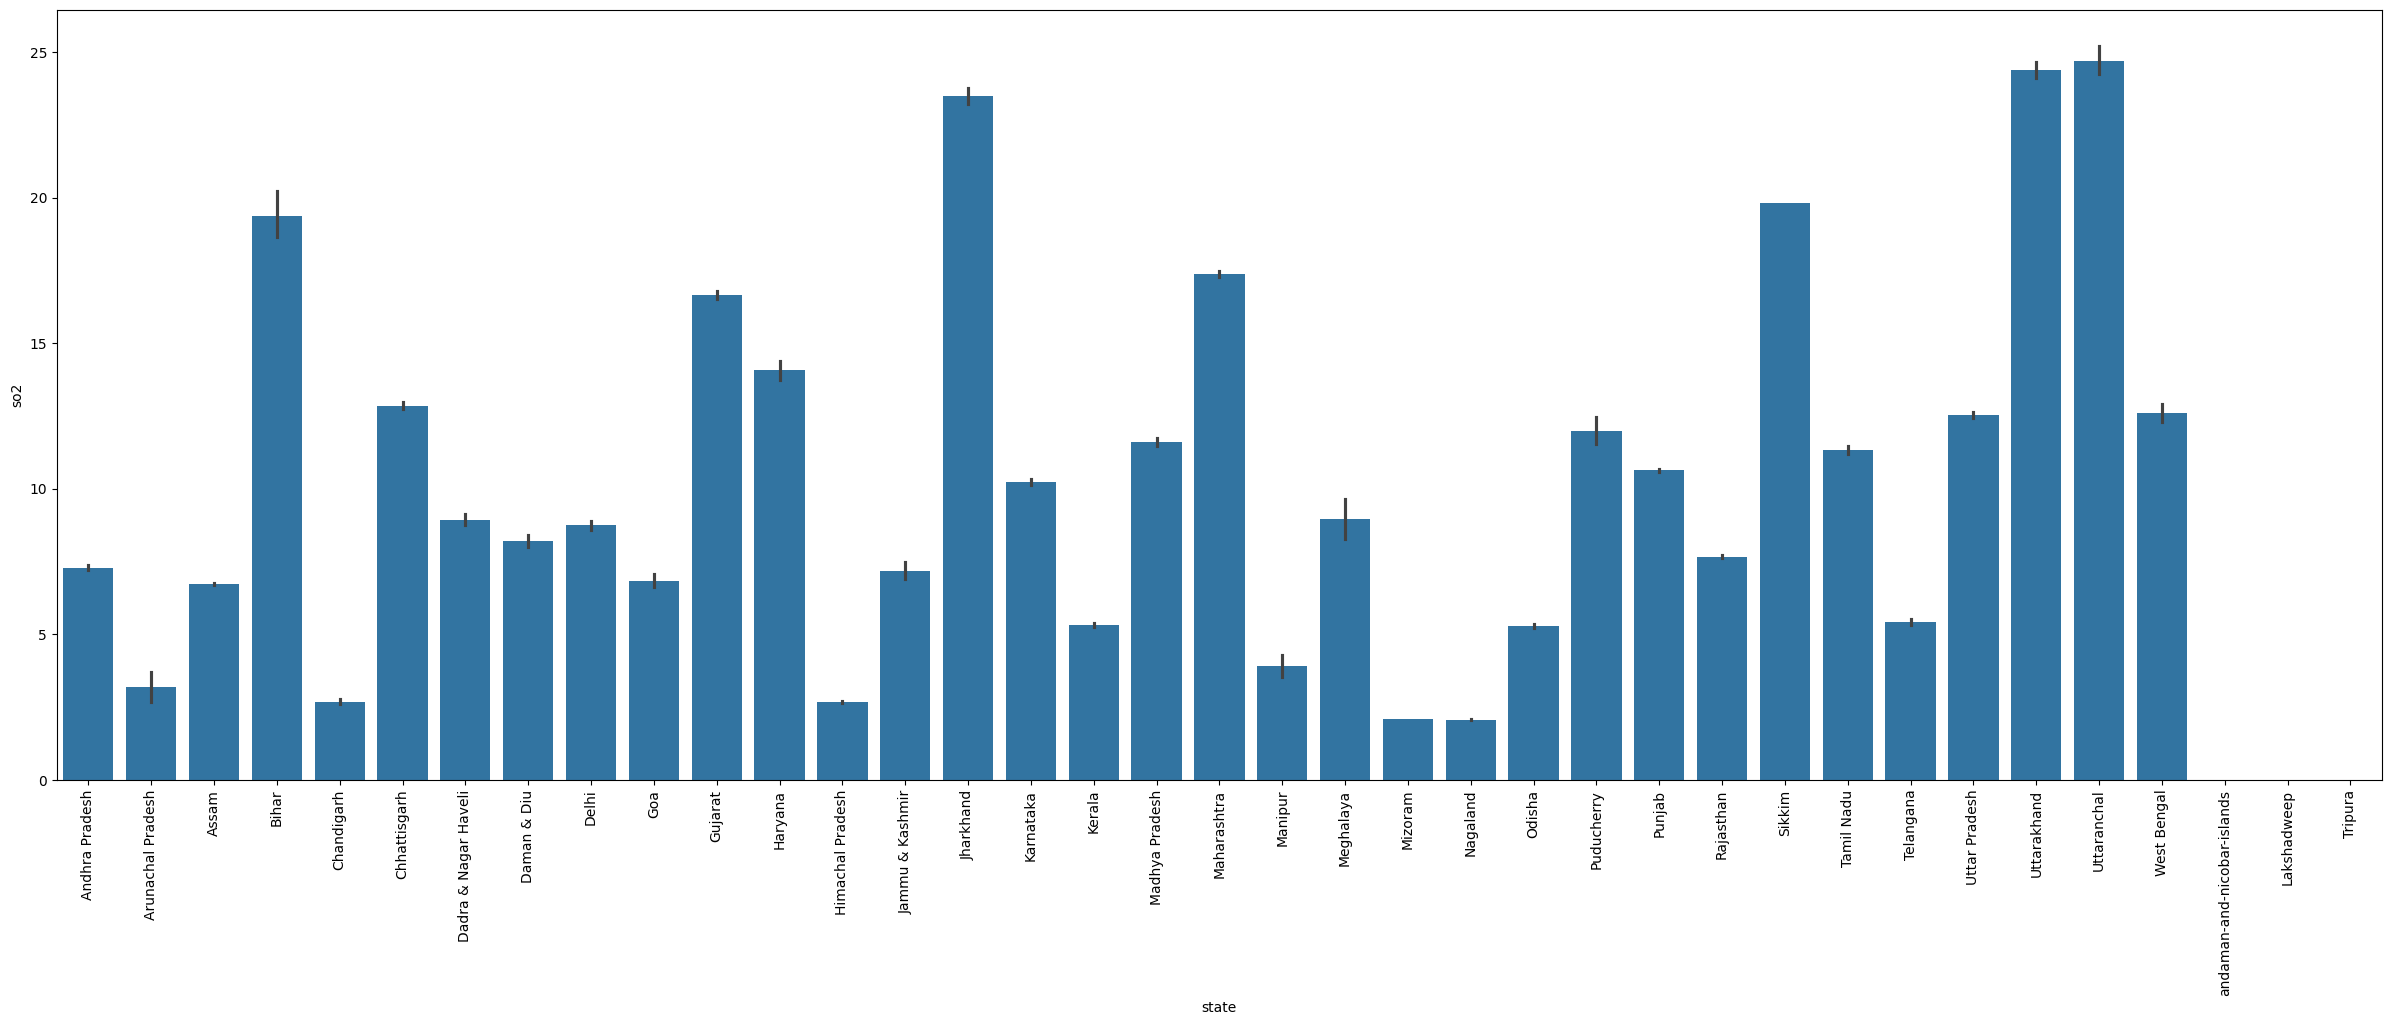

In [222]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)
# This visualization shows the name of the state having higher so2 levels in the air which is Uttranchal followed by Uttrakhand

In [223]:
plt.rcParams['figure.figsize']=(30,10)

In [224]:
df[['so2', 'state']].groupby(["state"]).mean().sort_values(by="so2").plot.bar(color="purple") 
plt.show() 
#We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and Its keys 
#Below we get a clear picture of the states in an increasing order based on their so2 levels.

<Axes: xlabel='state', ylabel='no2'>

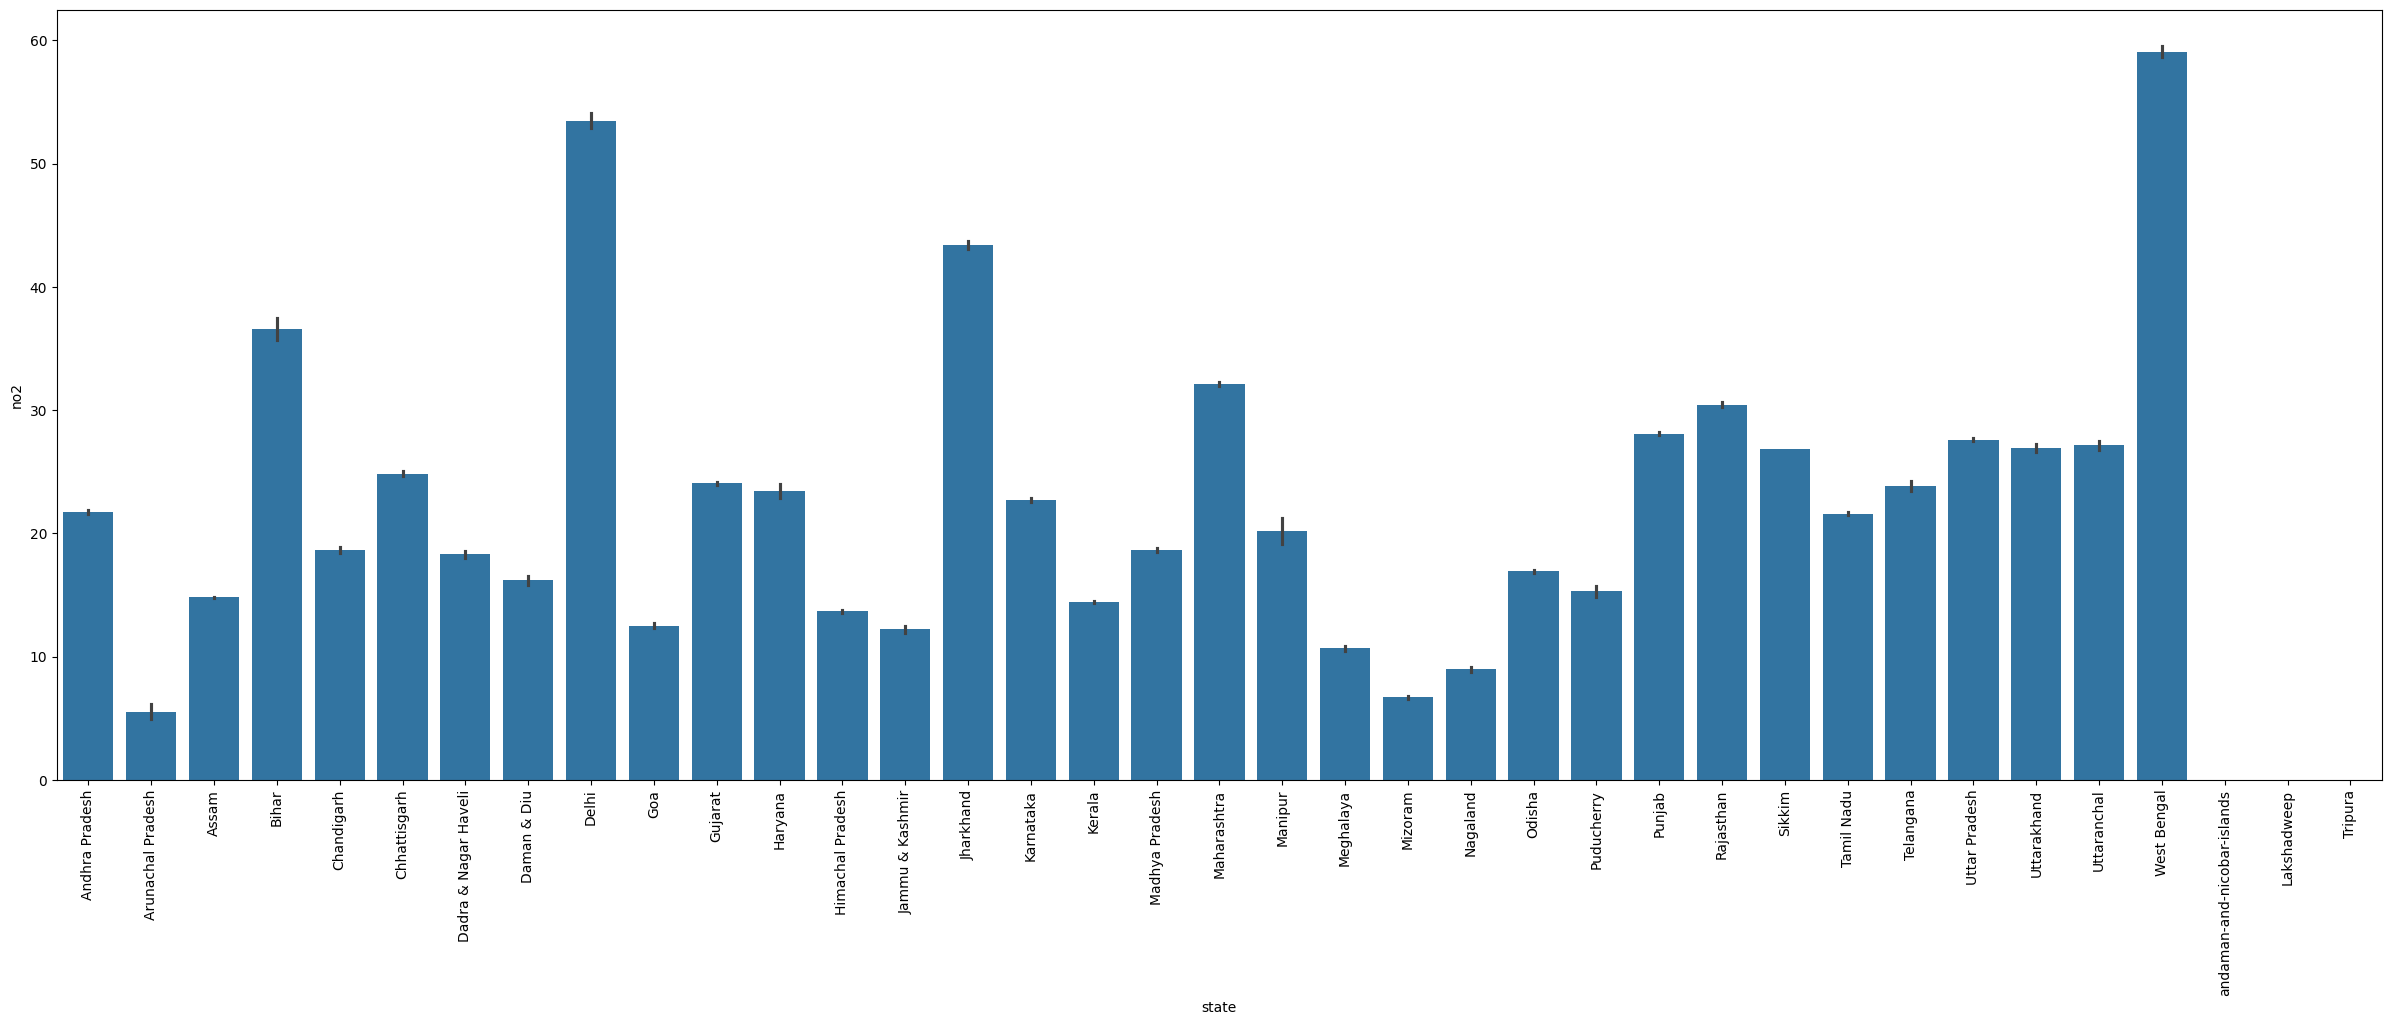

In [225]:
plt.figure(figsize=(30, 10)) 
plt.xticks(rotation=90) 
sns.barplot(x='state', y='no2',data=df) 
#West bengal has a higher no2 level compared to other states

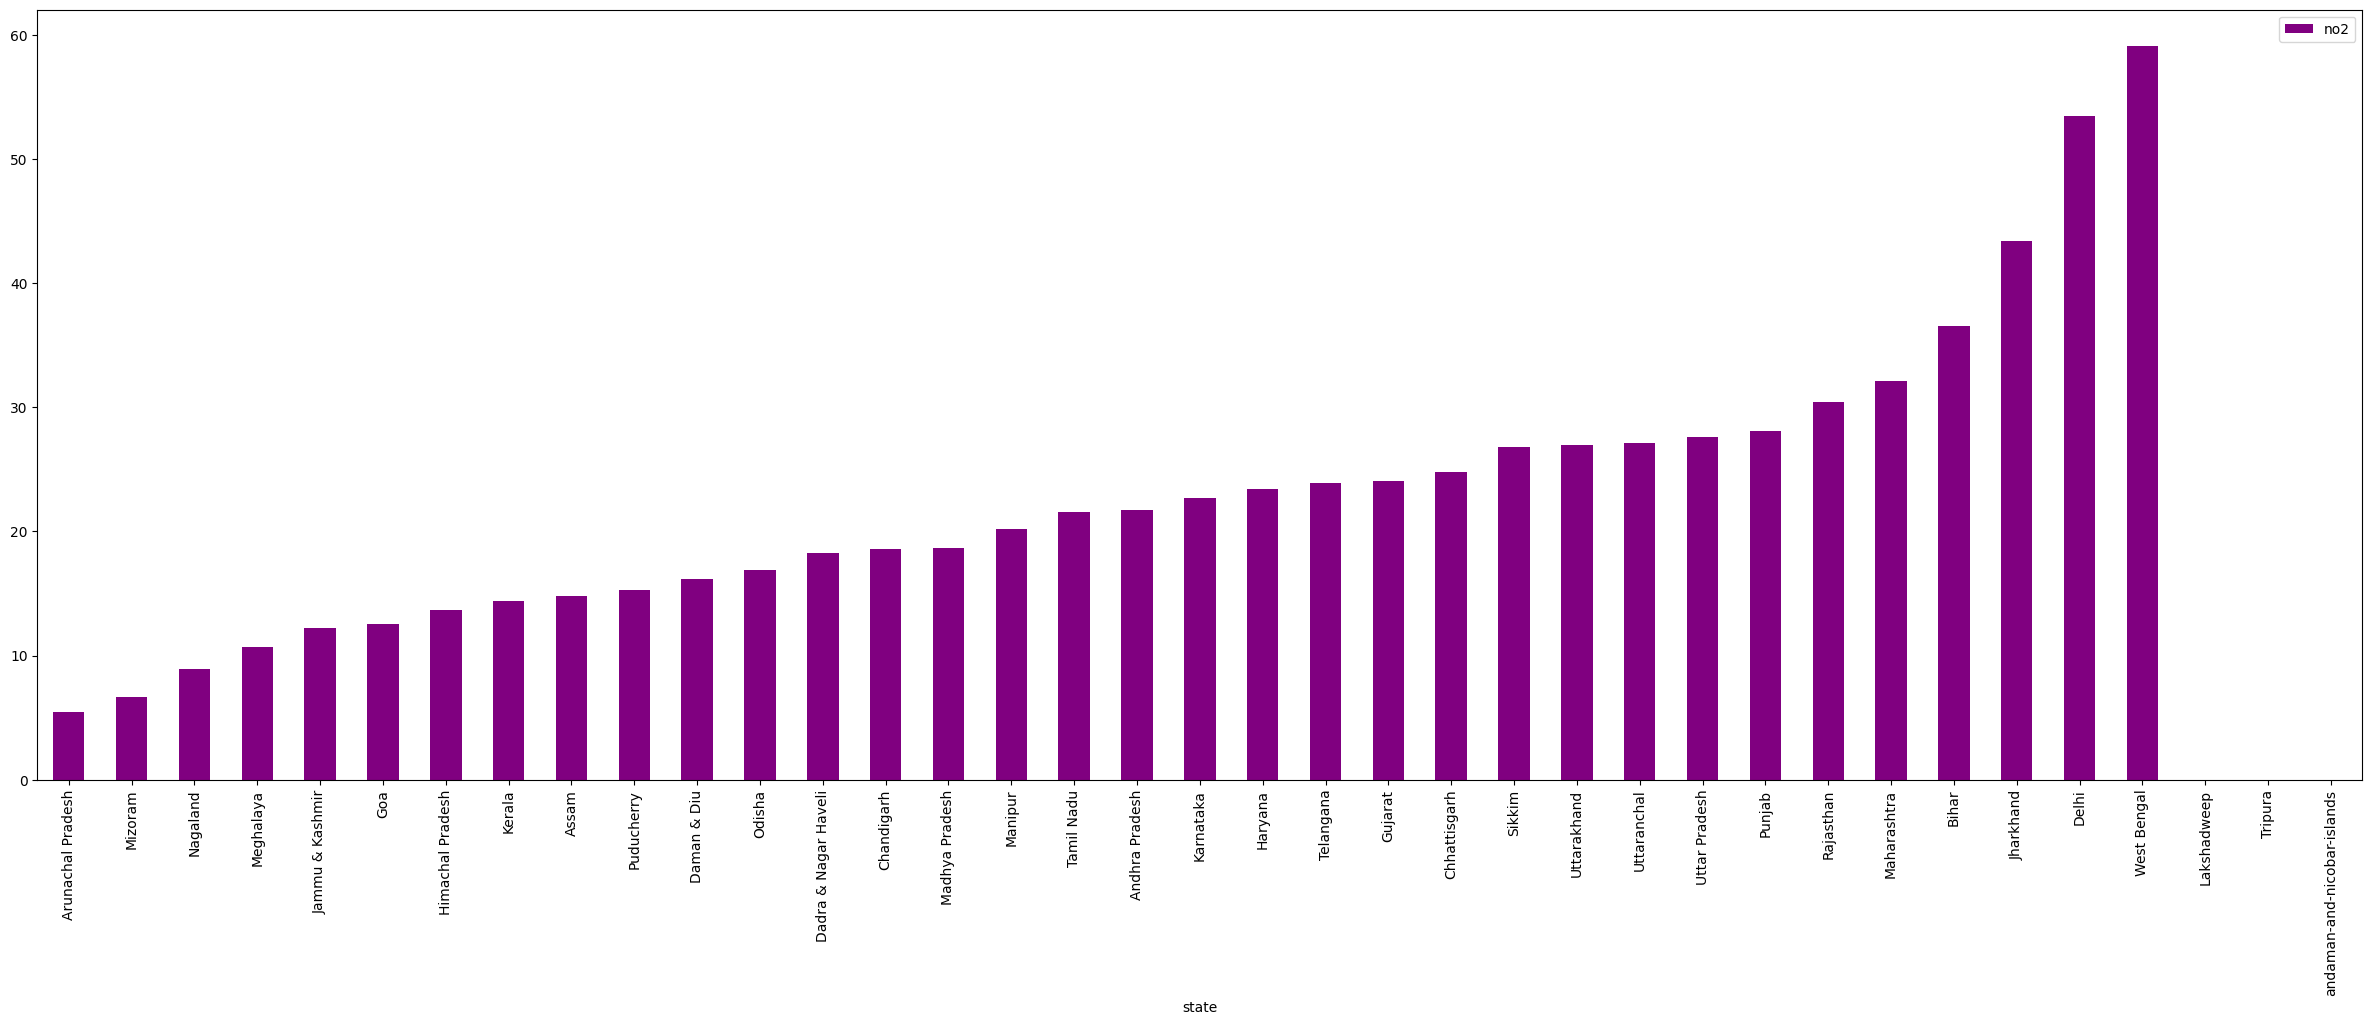

In [226]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color="purple") 
plt.show() 
#We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys Below we get a clear picture of the states in an increasing order based on their no2 levels.

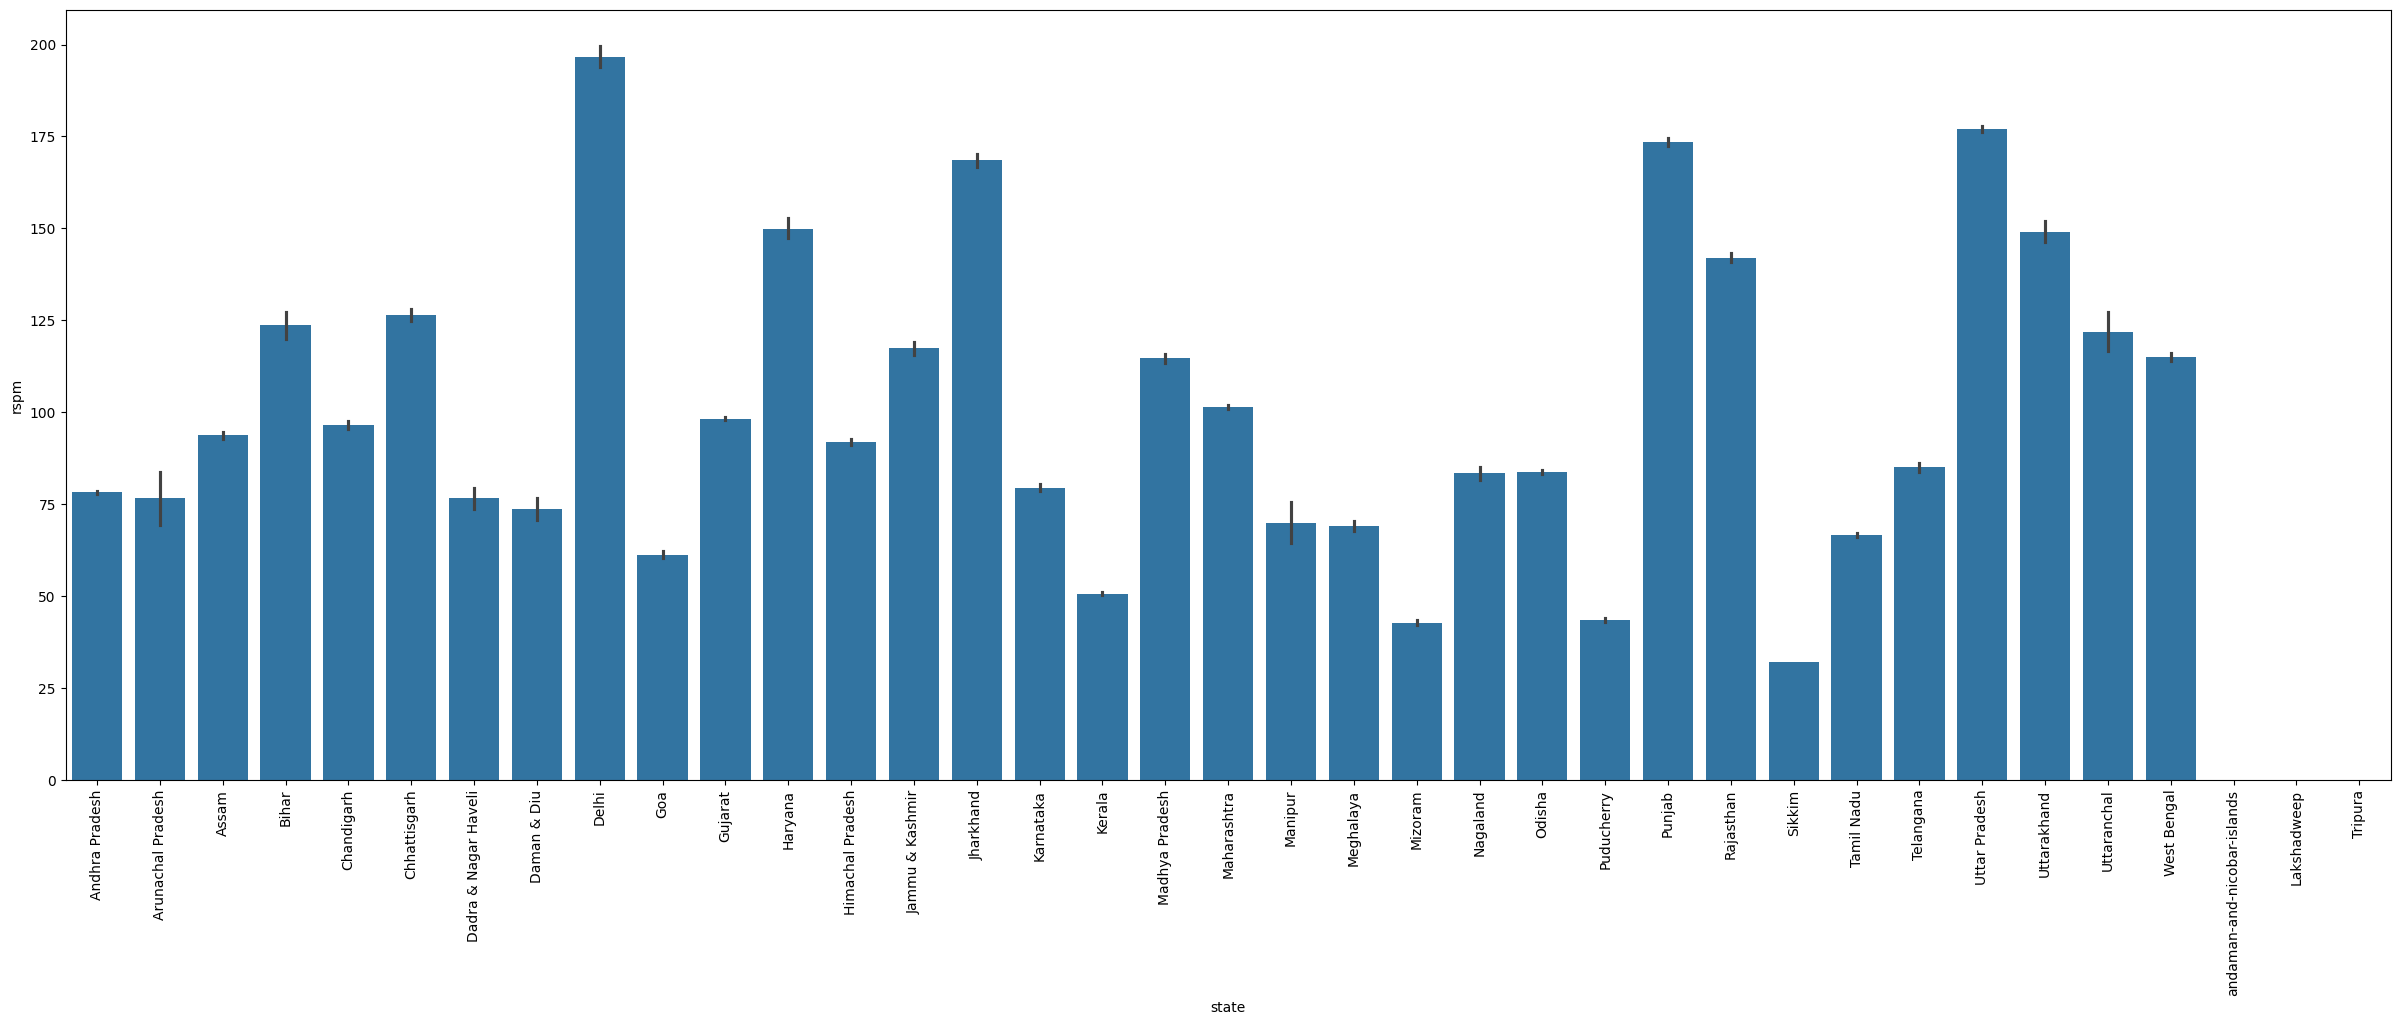

In [227]:
plt.figure(figsize=(30, 10)) 
plt.xticks(rotation=90) 
sns.barplot(x='state', y='rspm',data=df); 
# Delhi has higher rspm level compared to other states

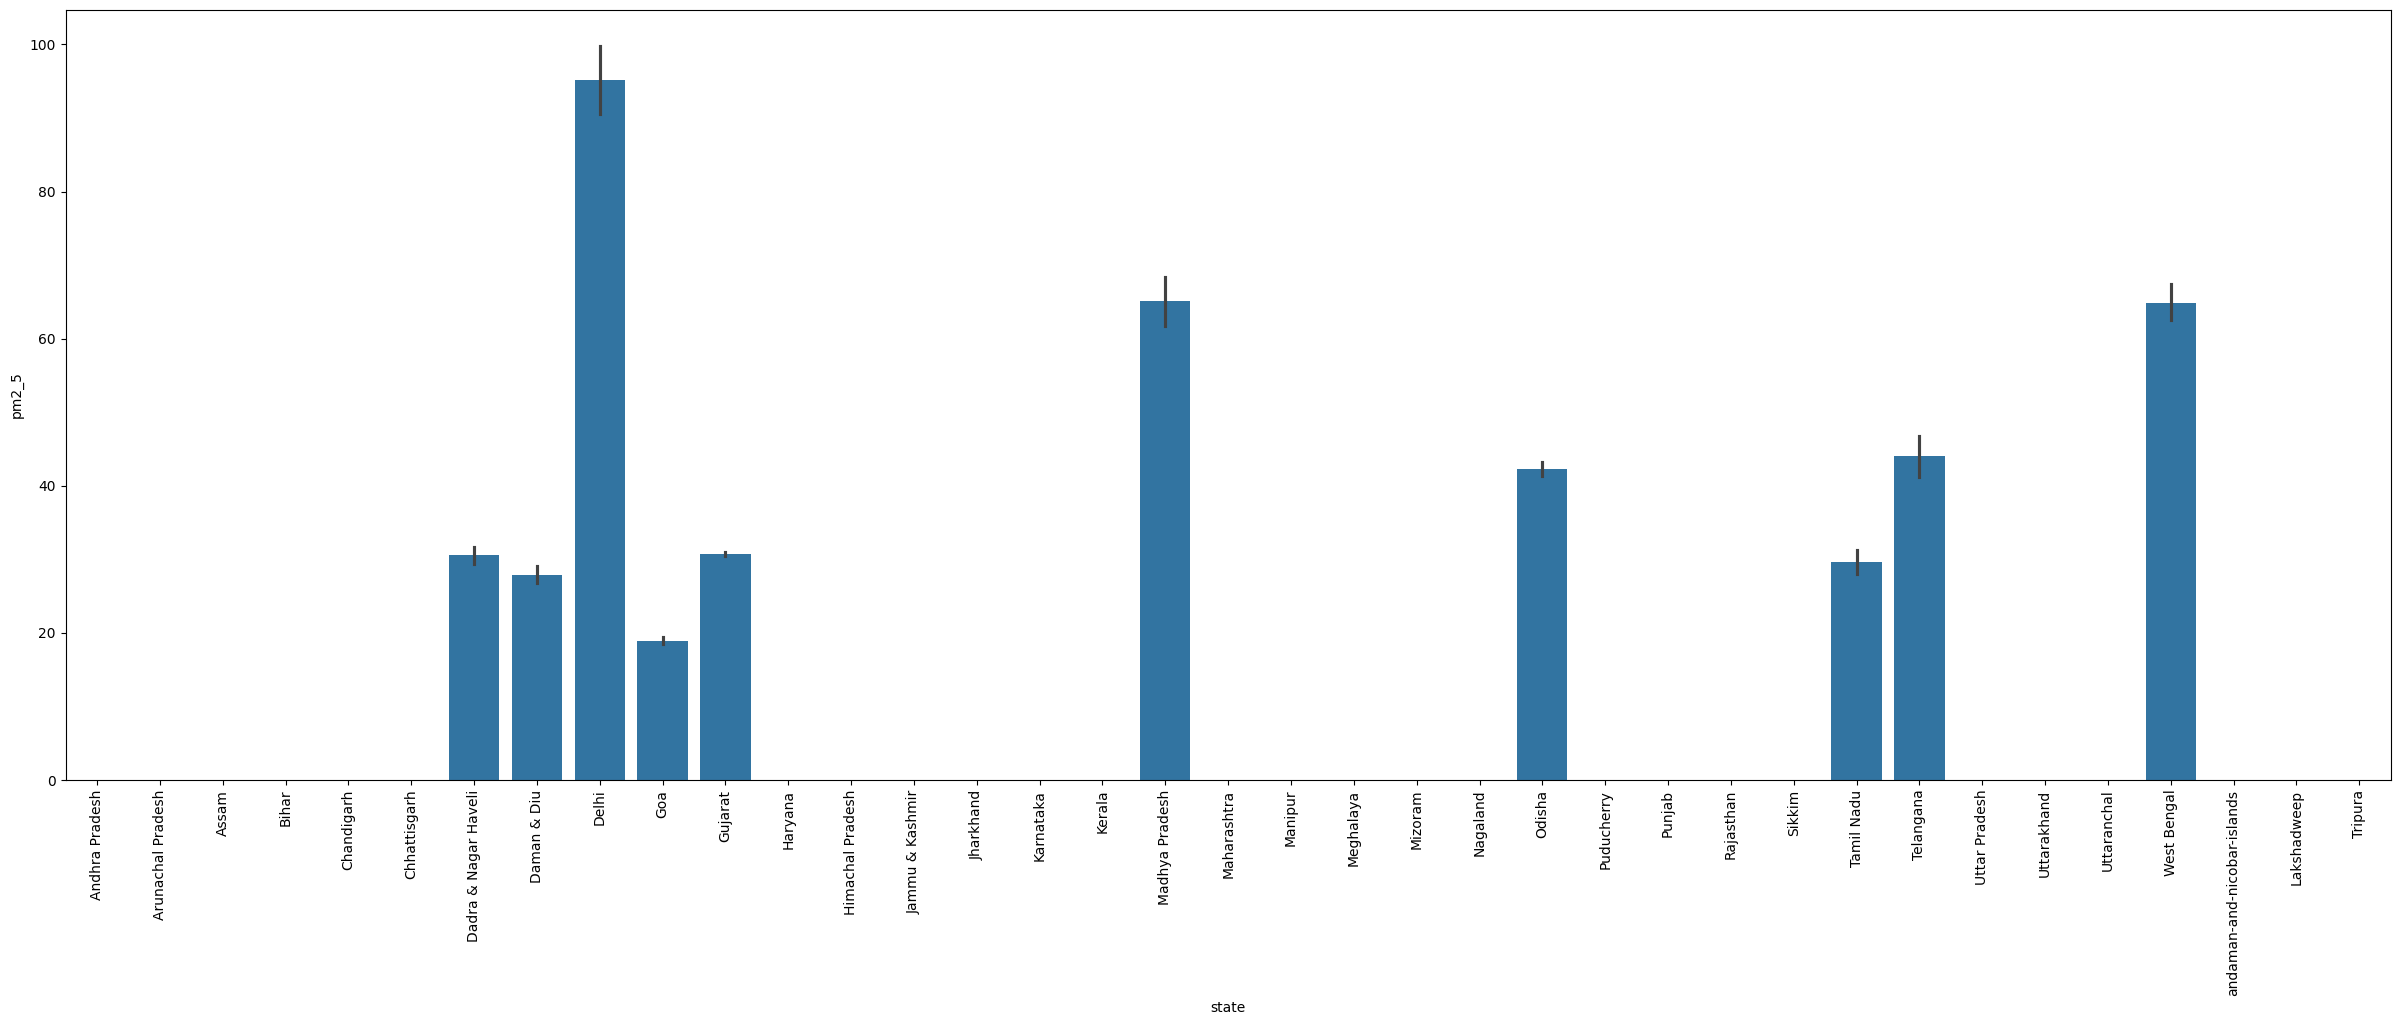

In [228]:
plt.figure(figsize=(30, 10)) 
plt.xticks(rotation=90) 
sns.barplot(x='state',y='pm2_5',data=df); 
#  Delhi has higher pm2_5 level compared to other states

# Checking all null values and treating those null values.

In [229]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [230]:
nullvalues
# higher null valuees present in pm2_5 followed by spm

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [231]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [232]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys = ['Total', 'Percent'])
# Concatenating total null values and their percentage o missing values for further imputation or column deletion

In [233]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
sampling_date                     3   0.000688
location                          3   0.000688
state                             0   0.000000

In [234]:
df.drop(['agency'], axis=1, inplace=True) 
df.drop(['stn_code'], axis=1,inplace=True) 
df.drop(['date'], axis=1,inplace=True) 
df.drop(['sampling_date'], axis=1,inplace=True) 
df.drop(['location_monitoring_station'], axis=1, inplace=True) 
#Dropping unnecessary columns

In [235]:
df.isnull().sum()
# Now checking the null values

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [236]:
df
# The following features are important for our machine learning models.

state   location  \
0                    Andhra Pradesh  Hyderabad   
1                    Andhra Pradesh  Hyderabad   
2                    Andhra Pradesh  Hyderabad   
3                    Andhra Pradesh  Hyderabad   
4                    Andhra Pradesh  Hyderabad   
...                             ...        ...   
435737                  West Bengal   ULUBERIA   
435738                  West Bengal   ULUBERIA   
435739  andaman-and-nicobar-islands        NaN   
435740                  Lakshadweep        NaN   
435741                      Tripura        NaN   

                                      type   so2   no2   rspm  spm  pm2_5  
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN    NaN  
1                          Industrial Area   3.1   7.0    NaN  NaN    NaN  
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN    NaN  
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN    NaN  
4                          Industrial Area   4.7   7.5    NaN  NaN    NaN  
...                                    ...   ...   ...    ...  ...    ...  
435737                               RIRUO  22.0  50.0  143.0  NaN    NaN  
435738                               RIRUO  20.0  46.0  171.0  NaN    NaN  
435739                                 NaN   NaN   NaN    NaN  NaN    NaN  
435740                                 NaN   NaN   NaN    NaN  NaN    NaN  
435741                                 NaN   NaN   NaN    NaN  NaN    NaN  

[435742 rows x 8 columns]

In [237]:
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])

# Null value Imputation for categorical data

In [238]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [239]:
df.isnull().sum()
# Now we have successfully imputed null values which were presesnt in the dataset.

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [240]:
df
# The following features are important for our machine learning models.

state   location  \
0                    Andhra Pradesh  Hyderabad   
1                    Andhra Pradesh  Hyderabad   
2                    Andhra Pradesh  Hyderabad   
3                    Andhra Pradesh  Hyderabad   
4                    Andhra Pradesh  Hyderabad   
...                             ...        ...   
435737                  West Bengal   ULUBERIA   
435738                  West Bengal   ULUBERIA   
435739  andaman-and-nicobar-islands   Guwahati   
435740                  Lakshadweep   Guwahati   
435741                      Tripura   Guwahati   

                                      type   so2   no2   rspm  spm  pm2_5  
0       Residential, Rural and other Areas   4.8  17.4    0.0  0.0    0.0  
1                          Industrial Area   3.1   7.0    0.0  0.0    0.0  
2       Residential, Rural and other Areas   6.2  28.5    0.0  0.0    0.0  
3       Residential, Rural and other Areas   6.3  14.7    0.0  0.0    0.0  
4                          Industrial Area   4.7   7.5    0.0  0.0    0.0  
...                                    ...   ...   ...    ...  ...    ...  
435737                               RIRUO  22.0  50.0  143.0  0.0    0.0  
435738                               RIRUO  20.0  46.0  171.0  0.0    0.0  
435739  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  
435740  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  
435741  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  

[435742 rows x 8 columns]

# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA

The air quality index is a piecewise linear function of the pollutant concentration.
At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used.

# Function to calculate so2 individual pollutant index(si)

In [241]:
def cal_SOi(so2):
    si = 0
    if so2 <= 40:
        si = so2 * (50 / 40)
    elif 40 < so2 <= 80:
        si = 50 + (so2 - 40) * (50 / 40)
    elif 80 < so2 <= 380:
        si = 100 + (so2 - 80) * (100 / 300)
    elif 380 < so2 <= 800:
        si = 200 + (so2 - 380) * (100 / 420)
    elif 800 < so2 <= 1600:
        si = 300 + (so2 - 800) * (100 / 800)
    elif so2 > 1600:
        si = 400 + (so2 - 1600) * (100 / 800)
    
    return si 

df['SOi'] = df['so2'].apply(cal_SOi)
data = df[['so2', 'SOi']]
print(data.head())

# Calculating the individual pollutant index for so2(sulphur dioxide)

   so2    SOi
0  4.8  6.000
1  3.1  3.875
2  6.2  7.750
3  6.3  7.875
4  4.7  5.875


# Function to calculate no2 individual pollutant index(ni)

In [242]:
def cal_Noi(no2):  # Function to calculate the NOI based on NO2 levels
    ni = 0
    if no2 <= 40:
        ni = no2 * (50 / 40)
    elif no2 > 40 and no2 <= 80:
        ni = 50 + (no2 - 40) * (50 / 40)
    elif no2 > 80 and no2 <= 180:
        ni = 100 + (no2 - 80) * (100 / 100)
    elif no2 > 180 and no2 <= 288:
        ni = 200 + (no2 - 180) * (100 / 100)
    elif no2 > 280 and no2 <= 400:
        ni = 300 + (no2 - 280) * (100 / 120)
    else:
        ni = 400 + (no2 - 400) * (100 / 120)
    
    return ni

# Apply the function to the 'no2' column and create a new 'Noi' column
df['Noi'] = df['no2'].apply(cal_Noi)

# Display the first few rows of the dataframe with 'no2' and 'Noi'
data = df[['no2', 'Noi']]  # Correct column reference
print(data.head())  # Display the first few rows


    no2     Noi
0  17.4  21.750
1   7.0   8.750
2  28.5  35.625
3  14.7  18.375
4   7.5   9.375


# Function to calculate rspm individual pollutant index(rpi)

In [243]:
def cal_RSPMI(rspm):  
    rpi = 0
    if rspm <= 30:
        rpi = rspm * (50 / 30)
    elif 30 < rspm <= 60:
        rpi = 50 + (rspm - 30) * (50 / 30)
    elif 60 < rspm <= 90:
        rpi = 100 + (rspm - 60) * (100 / 30)
    elif 90 < rspm <= 120:
        rpi = 200 + (rspm - 90) * (100 / 30)
    elif 120 < rspm <= 250:
        rpi = 300 + (rspm - 120) * (100 / 130)
    else:
        rpi = 400 + (rspm - 250) * (100 / 130)
    
    return rpi

# Apply the function to the 'rspm' column and create a new 'Rp1' column
df['Rpi'] = df['rspm'].apply(cal_RSPMI)

# Display the first few rows of the dataframe with 'rspm' and 'Rp1'
data = df[['rspm', 'Rpi']]  # Correct column reference
print(data.head())  # Display the first few rows


# Calculating the individual pollutant index for rspm(respirable suspended particulate matter concentration) 

   rspm  Rpi
0   0.0  0.0
1   0.0  0.0
2   0.0  0.0
3   0.0  0.0
4   0.0  0.0


# Function to calculate spm individual pollutant index(spi)

In [244]:
def cal_SPMI(spm): 
    spi = 0  # Initialize spi variable
    if spm <= 50: 
        spi = spm * 50 / 50
    elif spm > 50 and spm <= 100: 
        spi = 50 + (spm - 50) * (50 / 50)
    elif spm > 100 and spm <= 250: 
        spi = 100 + (spm - 100) * (100 / 150)
    elif spm > 250 and spm <= 350: 
        spi = 200 + (spm - 250) * (100 / 100)
    elif spm > 350 and spm <= 430: 
        spi = 300 + (spm - 350) * (100 / 80)
    else: 
        spi = 400 + (spm - 430) * (100 / 430)
    return spi

# Apply the function to the 'spm' column and create a new 'SPMI' column
df['SPMi'] = df['spm'].apply(cal_SPMI)

# Display the data
data = df[['spm', 'SPMi']]
print(data.head()) 


# Calculating the individual pollutant index for spm(suspended particulate matter)

   spm  SPMi
0  0.0   0.0
1  0.0   0.0
2  0.0   0.0
3  0.0   0.0
4  0.0   0.0


In [245]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'SOi', 'Noi', 'Rpi', 'SPMi'],
      dtype='object')

# Function to calculate the air quality index (AQI) of every data value

In [246]:
def cal_aqi(si, ni, rspmi, spmi):
    return max(si, ni, rspmi, spmi)  # Directly return the max value

df['AQI'] = df.apply(lambda x: cal_aqi(x['SOi'], x['Noi'], x['Rpi'], x['SPMi']), axis=1)
data = df[['state', 'SOi', 'Noi', 'Rpi', 'SPMi', 'AQI']]
data.head()


state    SOi     Noi  Rpi  SPMi     AQI
0  Andhra Pradesh  6.000  21.750  0.0   0.0  21.750
1  Andhra Pradesh  3.875   8.750  0.0   0.0   8.750
2  Andhra Pradesh  7.750  35.625  0.0   0.0  35.625
3  Andhra Pradesh  7.875  18.375  0.0   0.0  18.375
4  Andhra Pradesh  5.875   9.375  0.0   0.0   9.375

In [247]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'].apply(AQI_Range)

df.head()

# Using threshold values to classify a particular values as good, moderate, poor, 
# unhealthy, very unhealthy and Hazardous


state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm  pm2_5    SOi     Noi  Rpi  SPMi     AQI AQI_Range  
0   0.0  0.0    0.0  6.000  21.750  0.0   0.0  21.750      Good  
1   0.0  0.0    0.0  3.875   8.750  0.0   0.0   8.750      Good  
2   0.0  0.0    0.0  7.750  35.625  0.0   0.0  35.625      Good  
3   0.0  0.0    0.0  7.875  18.375  0.0   0.0  18.375      Good  
4   0.0  0.0    0.0  5.875   9.375  0.0   0.0   9.375      Good

In [248]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

AQI_Range
Poor              116298
Very unhealthy    108500
Moderate           79992
Unhealthy          71463
Hazardous          32210
Good               27279
Name: count, dtype: int64

# Splitting the dataset into Dependent and Independent columns

In [249]:
X = df[['SOi','Noi','Rpi','SPMi']]
y = df['AQI']
X.head()
# We only select columns like soi, noi, rpi, spmi

SOi     Noi  Rpi  SPMi
0  6.000  21.750  0.0   0.0
1  3.875   8.750  0.0   0.0
2  7.750  35.625  0.0   0.0
3  7.875  18.375  0.0   0.0
4  5.875   9.375  0.0   0.0

In [250]:
y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
# splitting the data into training and testing data

(348593, 4) (87149, 4) (348593,) (87149,)


# Linear Regression

In [252]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [253]:
# predicting train
train_pred = model.predict(X_train)
# predicting on test
test_pred = model.predict(X_test)

In [254]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', model.score(X_train, y_train))
print('RSquared value on test:', model.score(X_test, y_test))

RMSE TrainingData =  46.35601505718647
RMSE TestData =  46.523666818815286
--------------------------------------------------
RSquared value on train: 0.8605495499112897
RSquared value on test: 0.8589371232509474


# Decision Tree Regressor

In [255]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [256]:
# predicting train
train_preds = DT.predict(X_train)
# predicting on test
test_preds = DT.predict(X_test)

In [257]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train,train_preds)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', DT.score(X_train, y_train))
print('RSquared value on test:', DT.score(X_test, y_test))
 

RMSE TrainingData =  7.485943952936352e-11
RMSE TestData =  1.0932687723268335
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9999221033556945


# Random Forest Regressor

In [258]:
RF = RandomForestRegressor().fit(X_train, y_train)

In [259]:
# Predicting train
train_preds1 = RF.predict(X_train)
# predicting on test
test_preds1 = RF.predict(X_test)

In [260]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', RF.score(X_train, y_train))
print('RSquared value on test:', RF.score(X_test, y_test))
 

RMSE TrainingData =  2.5575468523830676
RMSE TestData =  1.026839894112351
--------------------------------------------------
RSquared value on train: 0.999575522253881
RSquared value on test: 0.9999312820287916


# Classification Algorithms

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [262]:
X2 = df[['SOi', 'Noi', 'Rpi', 'SPMi']]
y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

In [263]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data

# Logitic Regression

In [264]:
from sklearn.metrics import cohen_kappa_score

# le = LabelEncoder()
# y2 = le.fit_transform(y2)  # Convert AQI Range to numeric

# Split data into train & test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=70)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train2, y_train2)

# Predictions
train_pred2 = log_reg.predict(X_train2)
test_pred2 = log_reg.predict(X_test2)

# Model Evaluation
print("Model accuracy on train:", accuracy_score(y_train2, train_pred2))
print("Model accuracy on test:", accuracy_score(y_test2, test_pred2))
print("Kappa Score:", cohen_kappa_score(y_test2, test_pred2))


# This is very bad model here by using logistic

Model accuracy on train: 0.3920129338544325
Model accuracy on test: 0.39148788205431345
Kappa Score: 0.20812004301682696


In [265]:
# kappa  score is used to check the performance of the model.

# Decision Tree classifier

In [266]:
# Fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2, y_train2)

# predict
train_preds3 = DT2.predict(X_train2)

# accuracy
print("Model accuracy on train is: ", accuracy_score(y_train2, train_preds3))

# predict on test
test_preds3 = DT2.predict(X_test2)

# accuracy on test
print("Model accuracy on test is : ", accuracy_score(y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is:', metrics.cohen_kappa_score(y_test2, test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is :  0.9999582739316388
--------------------------------------------------
KappaScore is: 0.9999476312906251


In [267]:
# Observation
# -------------------------
# Here I evaluated our model using the Kappa score.
# accuracy of train and test is 100 % 
# It means this is overfitting accuracy on dt classifier.

# Random Forest Classifier

In [268]:
# fit the model on train data
RF = RandomForestClassifier().fit(X_train2, y_train2)

# predict on train
train_preds4 = RF.predict(X_train2)

# accuracy on train
print("Model accuracy on train is:", accuracy_score(y_train2, train_preds4))

# predict the test
test_preds4 = RF.predict(X_test2)

# accuracy on test
print("Model accuracy on test is:", accuracy_score(y_test2, test_preds4))
print('-'*50)

# Kappa score
print('KappaScore is: ', metrics.cohen_kappa_score(y_test2, test_preds4))

Model accuracy on train is: 1.0
Model accuracy on test is: 0.9998887304843701
--------------------------------------------------
KappaScore is:  0.9998603497402484


In [269]:
# This is also overfit in Random Forest

# K-Nearest Neightbours

In [270]:
# fit the model on traind data

KNN = KNeighborsClassifier().fit(X_train2, y_train2)

# predict on train
train_preds5 = KNN.predict(X_train2)

# accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train2, train_preds5))

# predict on test
test_preds5 = KNN.predict(X_test2)

# accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(y_test2, test_preds5))

Model accuracy on train is:  0.9949408625538197
Model accuracy on test is:  0.9914252929517716
--------------------------------------------------
KappaScore is:  0.9892372920854346


# Prediction

In [271]:
KNN.predict([[7.4, 47.7, 78.182, 100]])
# Predictions on random values

array(['Poor'], dtype=object)

In [272]:
KNN.predict([[1,1.2,3.12,0]])
# prediction on random values

array(['Good'], dtype=object)

In [273]:
KNN.predict([[325.7, 345,798.182,203]])
# Prediction on random values


array(['Hazardous'], dtype=object)

In [274]:
# so we have succesfully create our model for 
# regression as well as classification

In [276]:
KNN.predict([[0, 5, 10, 40]])

array(['Good'], dtype=object)

In [277]:
# Save cleaned data to a CSV file
df.to_csv('cleaned_data.csv', index=False)


## Conclusion

- **KNN performed well for moderate AQI values but struggled with extremes.**  
- **Regression gave precise predictions, while classification helped in AQI categorization.**  
- **Feature selection & hyperparameter tuning (n_neighbors) can improve accuracy.**  
- **Hybrid approaches (Neural Networks) can enhance results.**  
- **Further testing on diverse datasets can validate model reliability.**  
- **We can also perform time series analysis using models like ARIMA and SARIMA for better forecasting.**  


Thank you!